Simple Moving Average Backtesting

Using the SMAVectorBacktester from the book "Python for Algorithmic Trading"
by Yves Hilpisch, chapter 04 - Vectorized Backtesting.


Forex, 6 pairs
Daily data form 2010 to 2024

In [109]:
import yfinance as yf
import pandas as pd
import numpy as np

import SMAVectorBacktester as SMA

tickers = ['EURUSD=X', 'USDJPY=X', 'GBPUSD=X', 'USDCHF=X', 'USDCAD=X', 'AUDUSD=X']
download_data = yf.download(tickers, start="2010-01-01", end="2024-02-01", 
                     interval="1d", group_by='ticker', 
                     auto_adjust=True, threads=True)

df = pd.DataFrame()

for ticker in tickers:
    df[ticker] = download_data[ticker]["Close"]
df.to_excel('dataa.xlsx')

[*********************100%%**********************]  6 of 6 completed


In [110]:
EUR_USD = SMA.SMAVectorBacktester('EURUSD=X', 4, 12, '2010-1-1', '2024-1-1')
USD_JPY = SMA.SMAVectorBacktester('USDJPY=X', 4, 12, '2010-1-1', '2024-1-1')
GBP_USD = SMA.SMAVectorBacktester('GBPUSD=X', 4, 12, '2010-1-1', '2024-1-1')
USD_CHF = SMA.SMAVectorBacktester('USDCHF=X', 4, 12, '2010-1-1', '2024-1-1')
USD_CAD = SMA.SMAVectorBacktester('USDCAD=X', 4, 12, '2010-1-1', '2024-1-1')
AUD_USD = SMA.SMAVectorBacktester('AUDUSD=X', 4, 12, '2010-1-1', '2024-1-1')

In [111]:
def get_variable_name(variable):
    for name in globals():
        if id(globals()[name]) == id(variable):
            return name

    return None

In [112]:
df

,EURUSD=X,USDJPY=X,GBPUSD=X,USDCHF=X,USDCAD=X,AUDUSD=X
Date,,,,,,
2010-01-01,1.438994,92.919998,1.613294,1.03390,1.05120,0.898473
2010-01-04,1.442398,92.495003,1.611370,1.02910,1.04100,0.912492
2010-01-05,1.436596,91.584999,1.599079,1.03370,1.03950,0.911826
2010-01-06,1.440403,92.356003,1.602384,1.02760,1.03190,0.920471
2010-01-07,1.431803,93.389999,1.593397,1.03360,1.03400,0.917768
...,...,...,...,...,...,...
2024-01-25,1.088175,147.591003,1.271876,0.86302,1.35254,0.657670
2024-01-26,1.084705,147.723007,1.270826,0.86690,1.34777,0.658588
2024-01-29,1.084352,148.139999,1.269761,0.86414,1.34540,0.657860


In [113]:
%matplotlib inline

(1.53, 0.63)


C:\Users\mateu\AppData\Local\Temp\ipykernel_31432\3108513715.py:12: FutureWarning: The behavior of pd.concat with len(keys) != len(objs) is deprecated. In a future version this will raise instead of truncating to the smaller of the two sequences
  df = pd.concat([df, pd.DataFrame({'ticker':get_variable_name(i),
C:\Users\mateu\AppData\Local\Temp\ipykernel_31432\3108513715.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame({'ticker':get_variable_name(i),


(2.39, 0.85)


C:\Users\mateu\AppData\Local\Temp\ipykernel_31432\3108513715.py:12: FutureWarning: The behavior of pd.concat with len(keys) != len(objs) is deprecated. In a future version this will raise instead of truncating to the smaller of the two sequences
  df = pd.concat([df, pd.DataFrame({'ticker':get_variable_name(i),


(1.5, 0.67)


C:\Users\mateu\AppData\Local\Temp\ipykernel_31432\3108513715.py:12: FutureWarning: The behavior of pd.concat with len(keys) != len(objs) is deprecated. In a future version this will raise instead of truncating to the smaller of the two sequences
  df = pd.concat([df, pd.DataFrame({'ticker':get_variable_name(i),


(1.1, 0.31)


C:\Users\mateu\AppData\Local\Temp\ipykernel_31432\3108513715.py:12: FutureWarning: The behavior of pd.concat with len(keys) != len(objs) is deprecated. In a future version this will raise instead of truncating to the smaller of the two sequences
  df = pd.concat([df, pd.DataFrame({'ticker':get_variable_name(i),


(1.25, -0.01)


C:\Users\mateu\AppData\Local\Temp\ipykernel_31432\3108513715.py:12: FutureWarning: The behavior of pd.concat with len(keys) != len(objs) is deprecated. In a future version this will raise instead of truncating to the smaller of the two sequences
  df = pd.concat([df, pd.DataFrame({'ticker':get_variable_name(i),


(1.54, 0.79)


C:\Users\mateu\AppData\Local\Temp\ipykernel_31432\3108513715.py:12: FutureWarning: The behavior of pd.concat with len(keys) != len(objs) is deprecated. In a future version this will raise instead of truncating to the smaller of the two sequences
  df = pd.concat([df, pd.DataFrame({'ticker':get_variable_name(i),


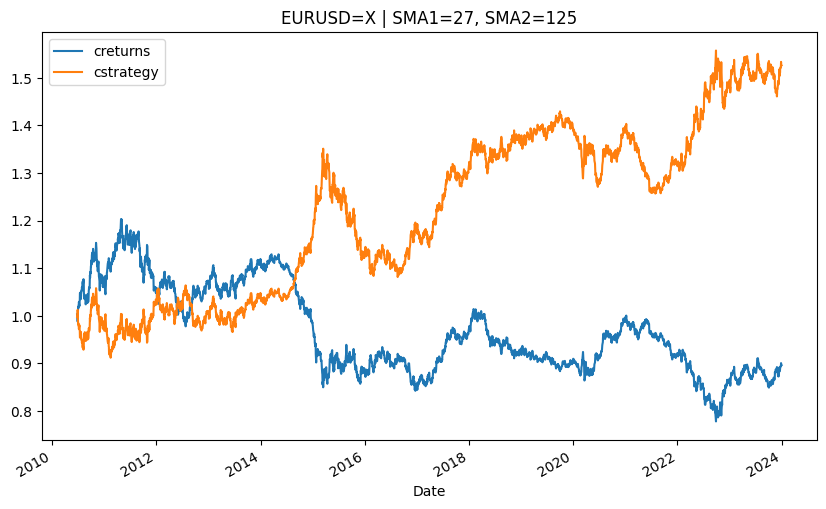

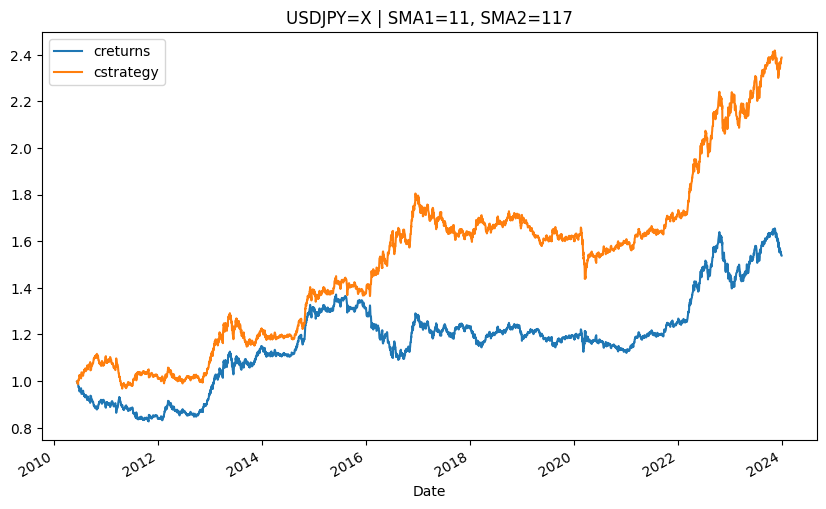

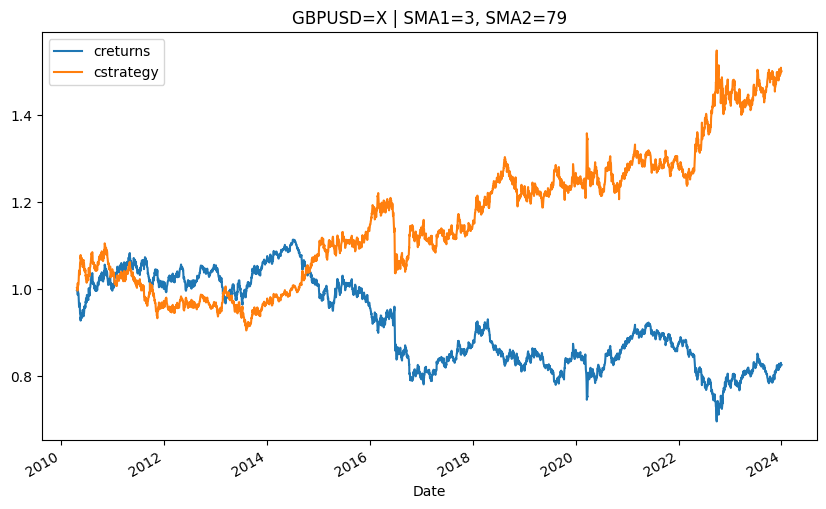

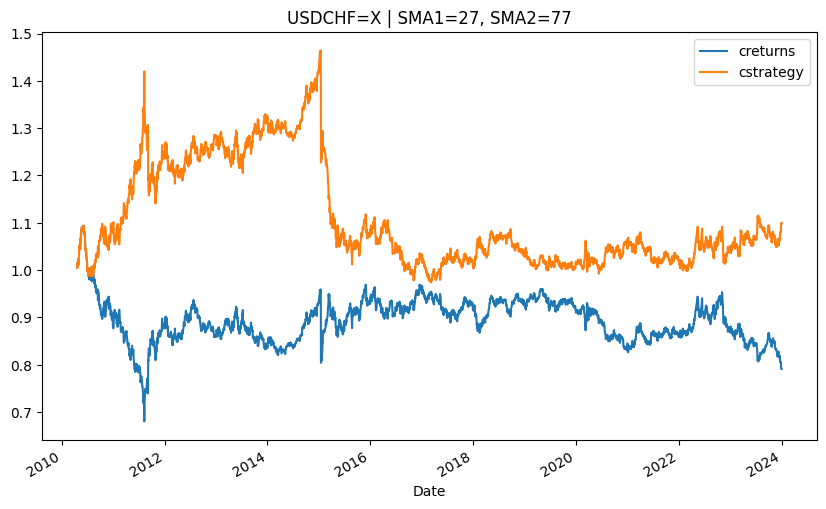

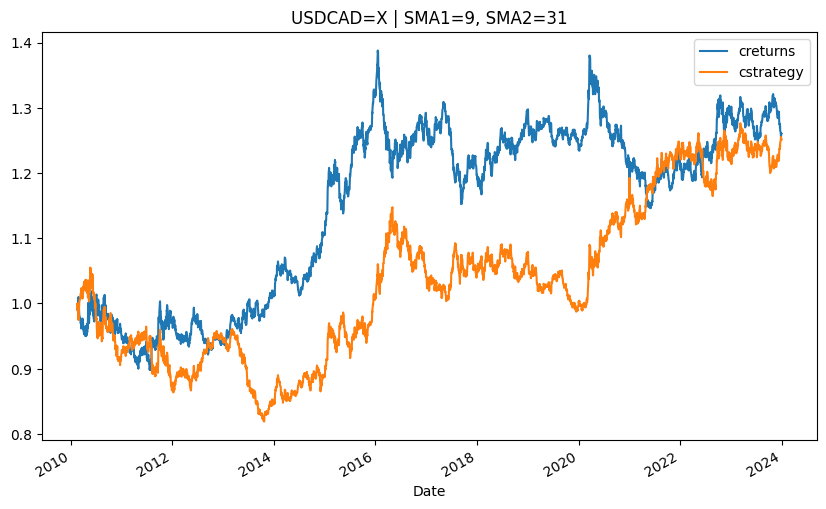

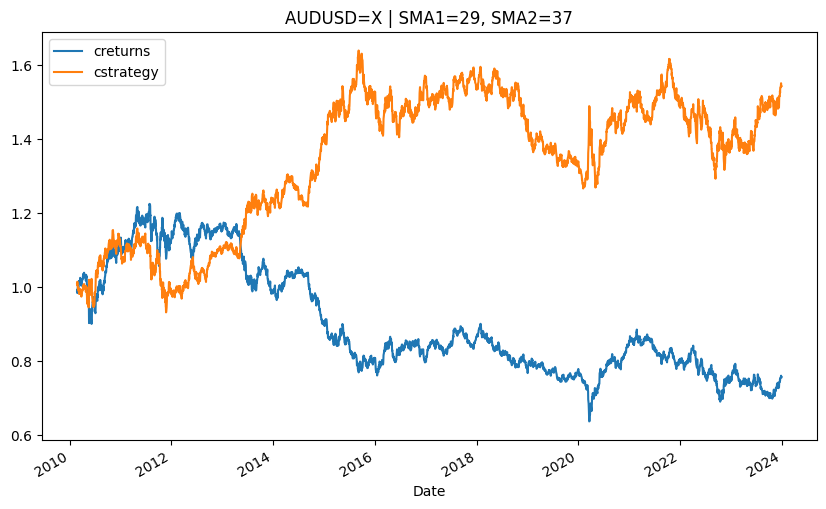

In [223]:
#Results returned are rounded, 2nd number here is the outperformance, i.e. not the benchmark return as before
df = pd.DataFrame(columns=['ticker','short_window', 'long_window'])
r= {}

for i in [EUR_USD, USD_JPY, GBP_USD, USD_CHF, USD_CAD, AUD_USD]:
    print(i.run_strategy())
    # print(i.optimize_parameters((1, 12, 2),
    #                       (12, 20, 2)))

    for_now = i.optimize_parameters((1, 30, 2),
                          (31, 150, 2))
    df = pd.concat([df, pd.DataFrame({'ticker':get_variable_name(i),
                                      'short_window': for_now[0][0],
                                      'long_window':for_now[0][1]},
                                      index=[1])], ignore_index=True,
                                      keys=['ticker','short_window', 'long_window'])
    i.plot_results()


In [224]:
print(EUR_USD.results)

               price    return      SMA1      SMA2  position  strategy  \
Date                                                                     
2010-06-25  1.237302  0.002879  1.225156  1.329488        -1 -0.002879   
2010-06-28  1.227702 -0.007789  1.224408  1.327770        -1  0.007789   
2010-06-29  1.218635 -0.007412  1.222998  1.326027        -1  0.007412   
2010-06-30  1.223002  0.003577  1.222553  1.324288        -1 -0.003577   
2010-07-01  1.250750  0.022435  1.223152  1.322839        -1 -0.022435   
...              ...       ...       ...       ...       ...       ...   
2023-12-26  1.102026 -0.000573  1.090470  1.081538         1 -0.000573   
2023-12-27  1.104301  0.002063  1.090974  1.081664         1  0.002063   
2023-12-28  1.110864  0.005926  1.091576  1.081866         1  0.005926   
2023-12-29  1.106819 -0.003648  1.092132  1.082008         1 -0.003648   
2024-01-01  1.105583 -0.001117  1.092743  1.082077         1 -0.001117   

            creturns  cstrategy  
Dat

In [225]:
# 'EURUSD=X', 'USDJPY=X', 'GBPUSD=X', 'USDCHF=X', 'USDCAD=X', 'AUDUSD=X'

# Calculation of the sum of the log-returns
# not a good economic measure yet but it is a good first indicator. 
# it's hard to interpret the numbers

total_return1 = EUR_USD.results['return'].sum()
total_return2 = USD_JPY.results['return'].sum()
total_return3 = GBP_USD.results['return'].sum()
total_return4 = USD_CHF.results['return'].sum()
total_return5 = USD_CAD.results['return'].sum()
total_return6 = AUD_USD.results['return'].sum()
# results_matrix = pd.DataFrame(columns=['EUR_USD', 'USD_JPY', 'GBP_USD', 'USD_CHF', 'USD_CAD', 'AUD_USD'])
total_results_matrix = {'EUR_USD': total_return1,  
                        'USD_JPY': total_return2,  
                        'GBP_USD': total_return3,
                        'USD_CHF': total_return4,  
                        'USD_CAD': total_return5,  
                        'AUD_USD': total_return6} 

total_results_matrix

{'EUR_USD': -0.1096815615135318,
 'USD_JPY': 0.43076975900633985,
 'GBP_USD': -0.1912699809904432,
 'USD_CHF': -0.2344512201377373,
 'USD_CAD': 0.23137842869200365,
 'AUD_USD': -0.2774829947803015}

In [226]:
# sharpe_ratio = USD_JPY.results['return'].mean() / USD_JPY.results['return'].std() * np.sqrt(252)
sharpe_ratio1 = EUR_USD.results['return'].mean() / USD_JPY.results['return'].std() * np.sqrt(252)
sharpe_ratio2 = USD_JPY.results['return'].mean() / USD_JPY.results['return'].std() * np.sqrt(252)
sharpe_ratio3 = GBP_USD.results['return'].mean() / USD_JPY.results['return'].std() * np.sqrt(252)
sharpe_ratio4 = USD_CHF.results['return'].mean() / USD_JPY.results['return'].std() * np.sqrt(252)
sharpe_ratio5 = USD_CAD.results['return'].mean() / USD_JPY.results['return'].std() * np.sqrt(252)
sharpe_ratio6 = AUD_USD.results['return'].mean() / USD_JPY.results['return'].std() * np.sqrt(252)

sharpe_matrix = {'EUR_USD': sharpe_ratio1,  
               'USD_JPY': sharpe_ratio2,  
               'GBP_USD': sharpe_ratio3,  
               'USD_CHF': sharpe_ratio4,  
               'USD_CAD': sharpe_ratio5,  
               'AUD_USD': sharpe_ratio6}

type(sharpe_matrix)
print(sharpe_matrix)

{'EUR_USD': -0.0866775035739342, 'USD_JPY': 0.33965012926912375, 'GBP_USD': -0.14920360521405107, 'USD_CHF': -0.1827853667769515, 'USD_CAD': 0.17809303803777604, 'AUD_USD': -0.21393520980844874}


In [227]:
# now we apply the exponential function to leave the log-space 
# and get back to real world returns

real_return1 = EUR_USD.results[['return', 'strategy']].sum().apply(np.exp)
real_return2 = USD_JPY.results[['return', 'strategy']].sum().apply(np.exp)
real_return3 = GBP_USD.results[['return', 'strategy']].sum().apply(np.exp)
real_return4 = USD_CHF.results[['return', 'strategy']].sum().apply(np.exp)
real_return5 = USD_CAD.results[['return', 'strategy']].sum().apply(np.exp)
real_return6 = AUD_USD.results[['return', 'strategy']].sum().apply(np.exp)
# results_matrix = pd.DataFrame(columns=['EUR_USD', 'USD_JPY', 'GBP_USD', 'USD_CHF', 'USD_CAD', 'AUD_USD'])
real_results_matrix = {'EUR_USD': real_return1,  
                        'USD_JPY': real_return2,  
                        'GBP_USD': real_return3,
                        'USD_CHF': real_return4,  
                        'USD_CAD': real_return5,  
                        'AUD_USD': real_return6} 
# type(real_results_matrix)
# real_results_matrix

realresultdf = pd.DataFrame.from_dict(real_results_matrix, orient='index', columns=['return', 'strategy'])

realresultdf = realresultdf.T
realresultdf

,EUR_USD,USD_JPY,GBP_USD,USD_CHF,USD_CAD,AUD_USD
return,0.896119,1.538441,0.825910,0.791005,1.260336,0.757688
strategy,1.526397,2.387892,1.499902,1.100052,1.251238,1.544084


In [228]:
#Annualized return of the buy-and-hold as well as of the strategy

ann_return1 = EUR_USD.results[['return', 'strategy']].mean() * 252
ann_return2 = USD_JPY.results[['return', 'strategy']].mean() * 252
ann_return3 = GBP_USD.results[['return', 'strategy']].mean() * 252
ann_return4 = USD_CHF.results[['return', 'strategy']].mean() * 252
ann_return5 = USD_CAD.results[['return', 'strategy']].mean() * 252
ann_return6 = AUD_USD.results[['return', 'strategy']].mean() * 252

annualized_results_matrix = {'EUR_USD': ann_return1,  
                            'USD_JPY': ann_return2,  
                            'GBP_USD': ann_return3,
                            'USD_CHF': ann_return4,  
                            'USD_CAD': ann_return5,  
                            'AUD_USD': ann_return6} 


annualizedresultdf = pd.DataFrame.from_dict(annualized_results_matrix, orient='index', columns=['return', 'strategy'])

annualizedresultdf = annualizedresultdf.T
annualizedresultdf

,EUR_USD,USD_JPY,GBP_USD,USD_CHF,USD_CAD,AUD_USD
return,-0.007854,0.030778,-0.013520,-0.016563,0.016138,-0.019386
strategy,0.030285,0.062190,0.028657,0.006737,0.015633,0.030351


In [229]:
#Annualized standard deviation

ann_std1 = EUR_USD.results[['return', 'strategy']].std() * 252 ** 0.5
ann_std2 = USD_JPY.results[['return', 'strategy']].std() * 252 ** 0.5
ann_std3 = GBP_USD.results[['return', 'strategy']].std() * 252 ** 0.5
ann_std4 = USD_CHF.results[['return', 'strategy']].std() * 252 ** 0.5
ann_std5 = USD_CAD.results[['return', 'strategy']].std() * 252 ** 0.5
ann_std6 = AUD_USD.results[['return', 'strategy']].std() * 252 ** 0.5

annualized_std_matrix = {'EUR_USD': ann_std1,  
                        'USD_JPY': ann_std2,  
                        'GBP_USD': ann_std3,
                        'USD_CHF': ann_std4,  
                        'USD_CAD': ann_std5,  
                        'AUD_USD': ann_std6} 


annualizedSTDdf = pd.DataFrame.from_dict(annualized_std_matrix, orient='index', columns=['return', 'strategy'])

annualizedSTDdf = annualizedSTDdf.T
annualizedSTDdf

,EUR_USD,USD_JPY,GBP_USD,USD_CHF,USD_CAD,AUD_USD
return,0.085792,0.090617,0.089963,0.101659,0.077232,0.106843
strategy,0.085772,0.090553,0.089949,0.101664,0.077232,0.106833


In [230]:
# Creating the DataFrame with all results for each pair

dfres = pd.DataFrame([total_results_matrix, sharpe_matrix])
dfres = pd.concat([dfres, realresultdf, annualizedresultdf, annualizedSTDdf], ignore_index=True)
dfres = dfres.rename(index={0: 'Total Results', #Sum of the log-returns
                            1: 'Sharpe Ratio',
                            2: 'Real Return',
                            3:  'Real Strategy',
                            4: 'Annualized Return',
                            5: 'Annualized Strategy',
                            6: 'Annualized STD Return',
                            7: 'Annualized STD Strategy'})

In [231]:
dfres

,EUR_USD,USD_JPY,GBP_USD,USD_CHF,USD_CAD,AUD_USD
Total Results,-0.109682,0.430770,-0.191270,-0.234451,0.231378,-0.277483
Sharpe Ratio,-0.086678,0.339650,-0.149204,-0.182785,0.178093,-0.213935
Real Return,0.896119,1.538441,0.825910,0.791005,1.260336,0.757688
Real Strategy,1.526397,2.387892,1.499902,1.100052,1.251238,1.544084
Annualized Return,-0.007854,0.030778,-0.013520,-0.016563,0.016138,-0.019386
Annualized Strategy,0.030285,0.062190,0.028657,0.006737,0.015633,0.030351
Annualized STD Return,0.085792,0.090617,0.089963,0.101659,0.077232,0.106843
Annualized STD Strategy,0.085772,0.090553,0.089949,0.101664,0.077232,0.106833


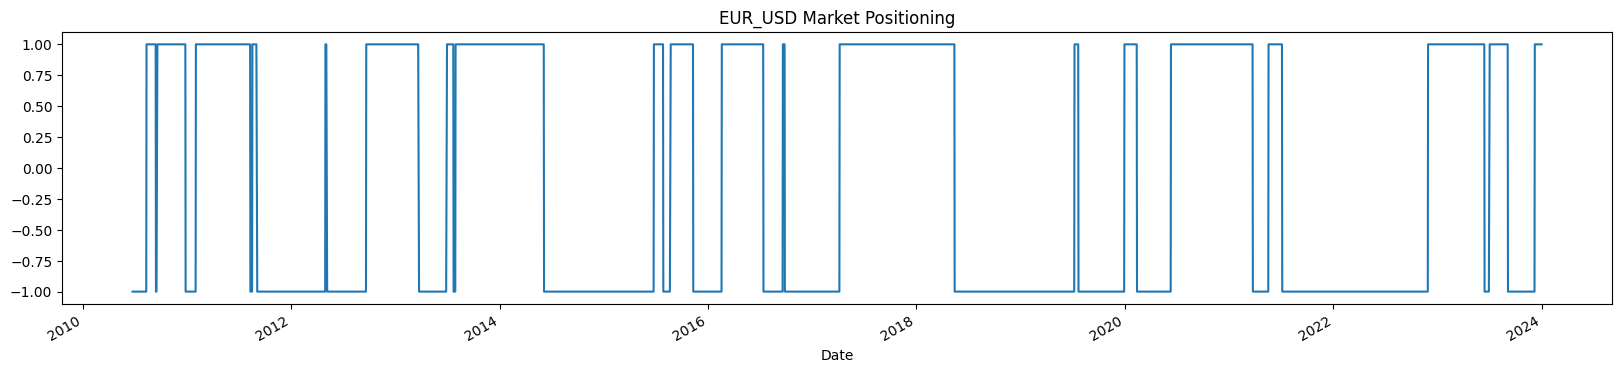

In [232]:
# Plotting the Position

u = EUR_USD.results
u['position'].plot(ylim=[-1.1, 1.1],
                      title='EUR_USD Market Positioning',
                      figsize=(20, 4));

In [233]:
# For plot of cumulative returns and maximum cummax

cummax1 = EUR_USD.results['creturns'].cummax()
cummax2 = USD_JPY.results['creturns'].cummax()
cummax3 = GBP_USD.results['creturns'].cummax()
cummax4 = USD_CHF.results['creturns'].cummax()
cummax5 = USD_CAD.results['creturns'].cummax()
cummax6 = AUD_USD.results['creturns'].cummax()

<Axes: title={'center': 'EUR_USD Cummulative Results and Cummax'}, xlabel='Date'>

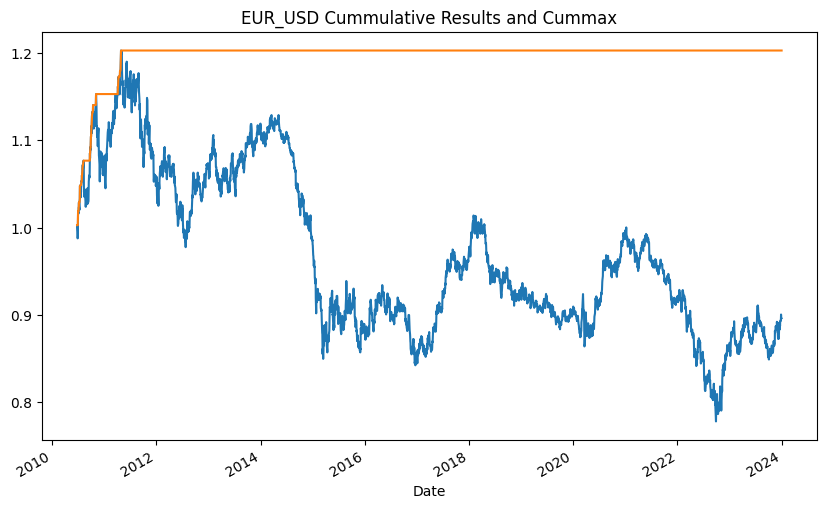

In [234]:
# Plot 1
ax1 = EUR_USD.results['creturns'].dropna().plot(figsize=(10, 6), xlabel='Date',
                                                title='EUR_USD Cummulative Results and Cummax')
cummax1.plot(ax=ax1, x='Date')


<Axes: title={'center': 'USD_JPY Cummulative Results and Cummax'}, xlabel='Date'>

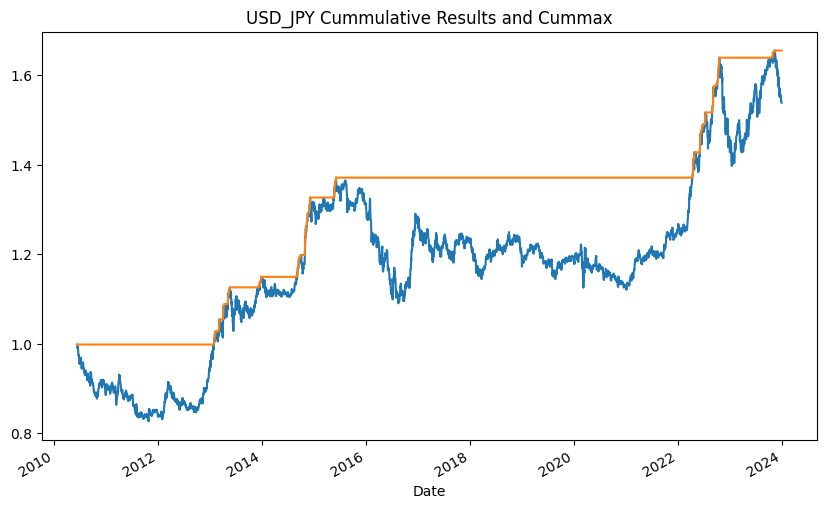

In [235]:
# Plot 2
ax2 = USD_JPY.results['creturns'].dropna().plot(figsize=(10, 6), xlabel='Date',
                                                title='USD_JPY Cummulative Results and Cummax')
cummax2.plot(ax=ax2, x='Date')

In [236]:
# Drawdown
drawdown1 = cummax1 - EUR_USD.results['creturns']
#Maximum drawdown in percentage points, i.e. 17.8%-points. This means if the peak was at 117.8% from the start the lowest point afterwards was at 100% again
drawdown1.max()

0.42536103038184103

<Axes: title={'center': 'Drowdown plot for EUR_USD'}, xlabel='Date'>

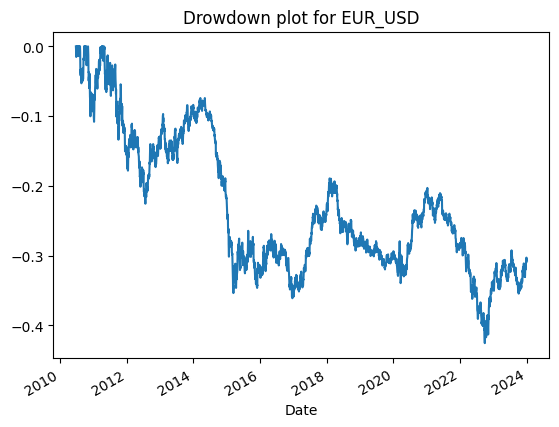

In [237]:
drawdown1=-1*drawdown1
drawdown1.plot(title='Drowdown plot for EUR_USD')